<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 18 Fitting

## Load data from a text file

In [5]:
using LsqFit, DelimitedFiles, Plots, StatsPlots, Formatting

data = readdlm("data/FP_basic_chi2_fit_data.txt", ',', Float64, '\n')
xd, yd, σ_yd = data[:,1], data[:,2], data[:,3]
data

5×3 Matrix{Float64}:
 1.0  1.7  0.5
 2.0  2.3  0.3
 3.0  3.5  0.4
 4.0  3.3  0.4
 5.0  4.3  0.6

## Define the fit model and fit the data

Fit model:

In [6]:
f(x, p) = p[1] .+ p[2] .* x

f (generic function with 1 method)

Fit the model to the data, taking error bars into account. For a non-linear fit, start values need to be defined:

In [15]:
wd = 1 ./ σ_yd.^2
pars = [0.5, 1.] # start values for the two fit parameters
fit = curve_fit(f, xd, yd, wd, pars)
fit.param

2-element Vector{Float64}:
 1.1620658908607135
 0.613944986880087

## Get the fit results

Covariance matrix of the fit parameters:

In [8]:
cov = estimate_covar(fit)

2×2 Matrix{Float64}:
  0.211186   -0.0646035
 -0.0646035   0.0234105

Uncertainties of the fit parameters:

In [9]:
se = standard_errors(fit)

2-element Vector{Float64}:
 0.4595501111513107
 0.15300476704680768

## Determine the reduced $\chi^2$:

In [10]:
chi2 = sum(fit.resid.^2)
printfmt("chi^2 / dof = {1:.3f} / {2:d}", chi2, dof(fit))

chi^2 / dof = 2.296 / 3

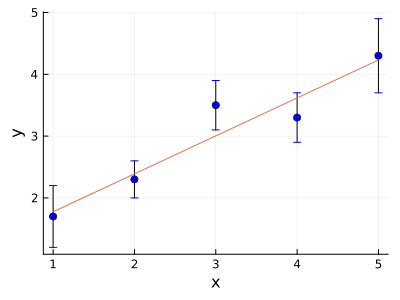

In [16]:
scatter(xd, yd, yerr = σ_yd, label = "", xlabel = "x", ylabel = "y", 
    markercolor="blue", markershape=:circle, size=(400,300))
plot!(xd, f(xd, fit.param), label = "")

## Illustrate the correlation of the fit parameters (error ellipse)

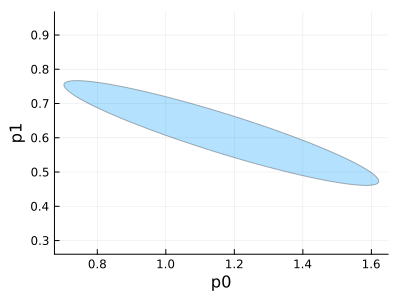

In [17]:
covellipse(fit.param, cov, n_std=1, aspect_ratio=1, label="", 
    xlabel = "p0", ylabel = "p1", size=(400,300))